# Pedro e o Lobo: Introdução ao Aprendizado por Reforço

Neste tutorial, vamos aprender como aplicar o aprendizado por reforço a um problema de busca de caminhos. O cenário é inspirado no conto musical [Pedro e o Lobo](https://en.wikipedia.org/wiki/Peter_and_the_Wolf), do compositor russo [Sergei Prokofiev](https://en.wikipedia.org/wiki/Sergei_Prokofiev). É a história de um jovem pioneiro, Pedro, que corajosamente sai de sua casa para uma clareira na floresta para perseguir um lobo. Vamos treinar algoritmos de aprendizado de máquina que ajudarão Pedro a explorar a área ao redor e construir um mapa de navegação otimizado.

Primeiro, vamos importar algumas bibliotecas úteis:


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import math

## Visão Geral do Aprendizado por Reforço

**Aprendizado por Reforço** (RL) é uma técnica de aprendizado que nos permite aprender o comportamento ideal de um **agente** em um determinado **ambiente** por meio da realização de vários experimentos. Um agente nesse ambiente deve ter algum **objetivo**, definido por uma **função de recompensa**.

## O Ambiente

Para simplificar, vamos considerar o mundo de Peter como um tabuleiro quadrado de tamanho `width` x `height`. Cada célula nesse tabuleiro pode ser:
* **chão**, onde Peter e outras criaturas podem caminhar
* **água**, onde obviamente não se pode caminhar
* **uma árvore** ou **grama** - um lugar onde você pode descansar
* **uma maçã**, que representa algo que Peter ficaria feliz em encontrar para se alimentar
* **um lobo**, que é perigoso e deve ser evitado

Para trabalhar com o ambiente, definiremos uma classe chamada `Board`. Para não sobrecarregar este notebook, movemos todo o código relacionado ao tabuleiro para um módulo separado chamado `rlboard`, que agora iremos importar. Você pode olhar dentro desse módulo para obter mais detalhes sobre os aspectos internos da implementação.


Vamos agora criar um tabuleiro aleatório e ver como ele fica:


In [4]:
# code block 1

## Ações e Política

No nosso exemplo, o objetivo de Peter seria encontrar uma maçã, enquanto evita o lobo e outros obstáculos. Defina essas ações como um dicionário e mapeie-as para pares de alterações correspondentes nas coordenadas.


In [5]:
# code block 2

A estratégia do nosso agente (Peter) é definida por uma chamada **política**. Vamos considerar a política mais simples chamada **caminhada aleatória**.

## Caminhada aleatória

Vamos primeiro resolver nosso problema implementando uma estratégia de caminhada aleatória.


In [ ]:
# Let's run a random walk experiment several times and see the average number of steps taken: code block 3

In [7]:
# code block 4

## Função de Recompensa

Para tornar nossa política mais inteligente, precisamos entender quais movimentos são "melhores" do que outros.


In [8]:
#code block 5

## Aprendizado Q

Construa uma Q-Table, ou matriz multidimensional. Como nosso tabuleiro tem dimensões `width` x `height`, podemos representar a Q-Table por um array numpy com formato `width` x `height` x `len(actions)`:


In [9]:
# code block 6

Passe a Q-Table para a função `plot` para visualizar a tabela no tabuleiro:


In [10]:
m.plot(Q)

NameError: name 'm' is not defined

## Essência do Q-Learning: Equação de Bellman e Algoritmo de Aprendizado

Escreva um pseudocódigo para o nosso algoritmo de aprendizado:

* Inicialize a Tabela Q (Q-Table) com números iguais para todos os estados e ações
* Defina a taxa de aprendizado $\alpha\leftarrow 1$
* Repita a simulação várias vezes
   1. Comece em uma posição aleatória
   1. Repita
        1. Selecione uma ação $a$ no estado $s$
        2. Execute a ação movendo-se para um novo estado $s'$
        3. Se encontrarmos uma condição de fim de jogo ou a recompensa total for muito baixa - saia da simulação  
        4. Calcule a recompensa $r$ no novo estado
        5. Atualize a Função Q de acordo com a equação de Bellman: $Q(s,a)\leftarrow (1-\alpha)Q(s,a)+\alpha(r+\gamma\max_{a'}Q(s',a'))$
        6. $s\leftarrow s'$
        7. Atualize a recompensa total e diminua $\alpha$.

## Explorar vs. Explorar

A melhor abordagem é equilibrar entre exploração e exploração. À medida que aprendemos mais sobre o nosso ambiente, estaremos mais propensos a seguir a rota ótima, no entanto, escolhendo o caminho inexplorado de vez em quando.

## Implementação em Python

Agora estamos prontos para implementar o algoritmo de aprendizado. Antes disso, também precisamos de uma função que converta números arbitrários na Tabela Q em um vetor de probabilidades para as ações correspondentes:


In [10]:
# code block 7

Adicionamos uma pequena quantidade de `eps` ao vetor original para evitar divisão por 0 no caso inicial, quando todos os componentes do vetor são idênticos.

O algoritmo de aprendizado real será executado por 5000 experimentos, também chamados de **épocas**:


In [56]:

from IPython.display import clear_output

lpath = []

# code block 8

Após executar este algoritmo, a Q-Table deve ser atualizada com valores que definem a atratividade de diferentes ações em cada etapa. Visualize a tabela aqui:


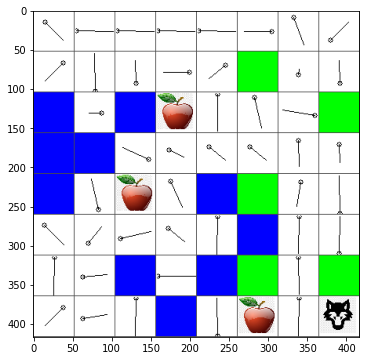

In [43]:
m.plot(Q)

## Verificando a Política

Como a Q-Table lista a "atratividade" de cada ação em cada estado, é bastante fácil usá-la para definir a navegação eficiente em nosso mundo. No caso mais simples, podemos simplesmente selecionar a ação correspondente ao maior valor na Q-Table:


In [13]:
# code block 9

2

Se você tentar o código acima várias vezes, pode perceber que, às vezes, ele simplesmente "trava", e você precisa pressionar o botão STOP no notebook para interrompê-lo.

> **Tarefa 1:** Modifique a função `walk` para limitar o comprimento máximo do caminho a um certo número de passos (digamos, 100), e observe o código acima retornar esse valor de tempos em tempos.

> **Tarefa 2:** Modifique a função `walk` para que ela não volte aos lugares onde já esteve anteriormente. Isso evitará que `walk` entre em um loop, no entanto, o agente ainda pode acabar "preso" em um local do qual não consegue escapar.


In [58]:

# code block 10

Average path length = 5.31, eaten by wolf: 0 times


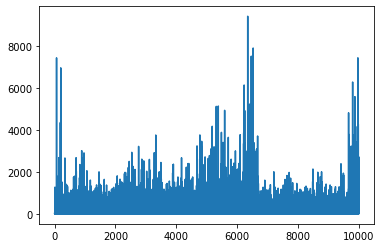

In [57]:
plt.plot(lpath)

## Exercício
## Um mundo mais realista de Pedro e o Lobo

### Introdução

Neste exercício, você criará um mundo mais realista para a história de Pedro e o Lobo. A ideia é usar programação para simular interações entre os personagens e o ambiente. 

### Objetivo

O objetivo é praticar conceitos de programação como classes, métodos e interações entre objetos. Além disso, você aprenderá a modelar um sistema simples que imita o comportamento de um mundo real.

### Passos

1. **Crie as classes principais**  
   Comece criando classes para os personagens principais: Pedro, o Lobo, e outros animais. Cada classe deve ter atributos e métodos que representem suas características e ações.

2. **Adicione interações**  
   Programe interações entre os personagens. Por exemplo, Pedro pode tentar capturar o Lobo, e o Lobo pode reagir de diferentes maneiras dependendo da situação.

3. **Simule o ambiente**  
   Crie uma classe para o ambiente onde a história acontece. O ambiente pode incluir elementos como árvores, cercas e outros objetos que influenciam as ações dos personagens.

4. **Teste o sistema**  
   Escreva um código para testar as interações e garantir que o sistema funcione como esperado. Experimente diferentes cenários para ver como os personagens reagem.

### Dicas

- Pense em como os personagens se comportariam em um mundo real. Por exemplo, o Lobo pode ter fome e procurar comida, enquanto Pedro pode usar ferramentas para capturá-lo.  
- Use herança para evitar duplicação de código. Por exemplo, se vários animais compartilham características semelhantes, você pode criar uma classe base "Animal".  
- Certifique-se de que as interações sejam dinâmicas e interessantes. Isso tornará o exercício mais divertido e desafiador.

### Exemplo

Aqui está um exemplo de como você pode começar:

```python
class Pedro:
    def __init__(self, nome, idade):
        self.nome = nome
        self.idade = idade

    def capturar_lobo(self):
        print(f"{self.nome} está tentando capturar o lobo!")

class Lobo:
    def __init__(self, fome):
        self.fome = fome

    def reagir(self):
        if self.fome:
            print("O lobo está faminto e fica agressivo!")
        else:
            print("O lobo está calmo e foge.")
```

### Conclusão

Este exercício é uma ótima maneira de praticar programação orientada a objetos e aprender a modelar sistemas. Divirta-se criando seu próprio mundo de Pedro e o Lobo!



---

**Aviso Legal**:  
Este documento foi traduzido utilizando o serviço de tradução por IA [Co-op Translator](https://github.com/Azure/co-op-translator). Embora nos esforcemos para garantir a precisão, esteja ciente de que traduções automáticas podem conter erros ou imprecisões. O documento original em seu idioma nativo deve ser considerado a fonte oficial. Para informações críticas, recomenda-se a tradução profissional feita por humanos. Não nos responsabilizamos por quaisquer mal-entendidos ou interpretações equivocadas decorrentes do uso desta tradução.
